My portion of the project requires looking at the relationship between sentiment and ratings.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
import seaborn as sns


In [2]:
path_gps_csv = os.path.join('..','..','Data','Raw','googleplaystore.csv')
path_gps_usr_rev_csv = os.path.join('..','..','Data','Raw','googleplaystore_user_reviews.csv')
path_comb_csv = os.path.join('..','..','Data','Combined','comb.csv')
path_comb_csv

'../../Data/Combined/comb.csv'

In [3]:
# import data
gps_df = pd.read_csv(path_gps_csv, low_memory=False)
gps_usr_rev_df = pd.read_csv(path_gps_usr_rev_csv, low_memory=False)
comb_df = pd.read_csv(path_comb_csv, low_memory=False)

In [4]:
gps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#identifying null values
count_of_null_value=comb_df.isnull().sum()
count_of_null_value.to_csv('output/nullvaluecounts_sentiment.csv')

print('Total number of observations: ', len(comb_df))
print('Counts of null values: ', '\n', count_of_null_value)

Total number of observations:  122662
Counts of null values:  
 App                           0
Category                      0
Rating                       40
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review         50057
Sentiment                 50047
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
dtype: int64


In [6]:
#clean the data that is there to remove rows of NA

reduced_comb_df = comb_df.loc[:, ['Category','Rating', 'Sentiment', 'Sentiment_Polarity', 'Content Rating']]

reduced_comb_df = reduced_comb_df.dropna()
reduced_comb_df.head()


,Category,Rating,Sentiment,Sentiment_Polarity,Content Rating
0,ART_AND_DESIGN,3.9,Negative,-0.250,Everyone
1,ART_AND_DESIGN,3.9,Negative,-0.725,Everyone
2,ART_AND_DESIGN,3.9,Neutral,0.000,Everyone
4,ART_AND_DESIGN,3.9,Positive,0.500,Everyone
5,ART_AND_DESIGN,3.9,Negative,-0.800,Everyone


In [7]:
#identifying null values
count_of_null_value=reduced_comb_df.isnull().sum()
count_of_null_value.to_csv('output/nullvaluecounts_sentiment_cleaned.csv')

print('Total number of observations: ', len(reduced_comb_df))
print('Counts of null values: ', '\n', count_of_null_value)

Total number of observations:  72576
Counts of null values:  
 Category              0
Rating                0
Sentiment             0
Sentiment_Polarity    0
Content Rating        0
dtype: int64


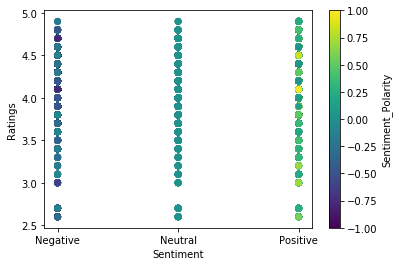

In [13]:
plt.close()

plt.scatter(reduced_comb_df['Sentiment'],reduced_comb_df['Rating'],c=reduced_comb_df['Sentiment_Polarity'])
clb = plt.colorbar()
plt.xlabel("Sentiment")
plt.ylabel("Ratings")
clb.set_label("Sentiment_Polarity")
plt.savefig('output/scatterplot.png')
plt.show()

# reduced_comb_df.plot(kind='scatter',x='Sentiment',y='Rating',color='red')
# plt.show()


# reduced_comb_df.plot(kind='bar',x='Sentiment',y='Rating')
# plt.savefig('output/bargraph.png')
# plt.show()


# ax = reduced_comb_df.plot.bar(rot=0)


Because of the lack of information in the sentiment category, I have re-evaluatied my question.  However, I still find there is interesting information to denote as it relates to the initial question of Sentiment compared to Ratings.  The data indicates that there is some correlation between Sentiment Polarity and the overall Sentiment.  What I find most interesting is that that the three categories of sentiment were spread across all level of ratings.

New Question:  What is the relationship between operating system and App Downloads?

In [17]:

android_version_df=comb_df['Android Ver'].value_counts()
# android_version_df.set_index('Android Ver')
# android_version_df.sort_index()
android_version_df.to_csv('output/DownloadsbyVersion.csv')
android_version_df


# CODE THAT DOESN'T WORK in order to change the sort of the list
# sorted_android_version_df = android_version_df.sort_values(android_version_df.columns[0])
# # android_version_sorted_df = android_version_df.sort_values('Count')
# # android_version_sorted_df = android_version_df.sort_values('Android Ver')
# # android_version_sorted_df = android_version_df.sort_values(android_version_df.columns[0], ascending = False)
# # android_version_sorted_df
# sorted_android_version_df

# android_version_df.hist(column ='Android_ver', by='value_counts', bins=50)

Varies with device    34630
4.1 and up            26863
4.0.3 and up          14722
4.4 and up            11920
5.0 and up            11180
4.0 and up             9163
2.3 and up             4783
4.2 and up             3398
2.3.3 and up           1520
4.3 and up             1240
3.0 and up              920
6.0 and up              840
2.2 and up              432
2.1 and up              320
4.4W and up             160
1.6 and up              111
5.1 and up               80
7.0 and up               73
8.0 and up               67
7.1 and up               40
2.0 and up               40
1.5 and up               40
3.2 and up               40
4.0.3 - 7.1.1            40
5.0 - 8.0                40
Name: Android Ver, dtype: int64

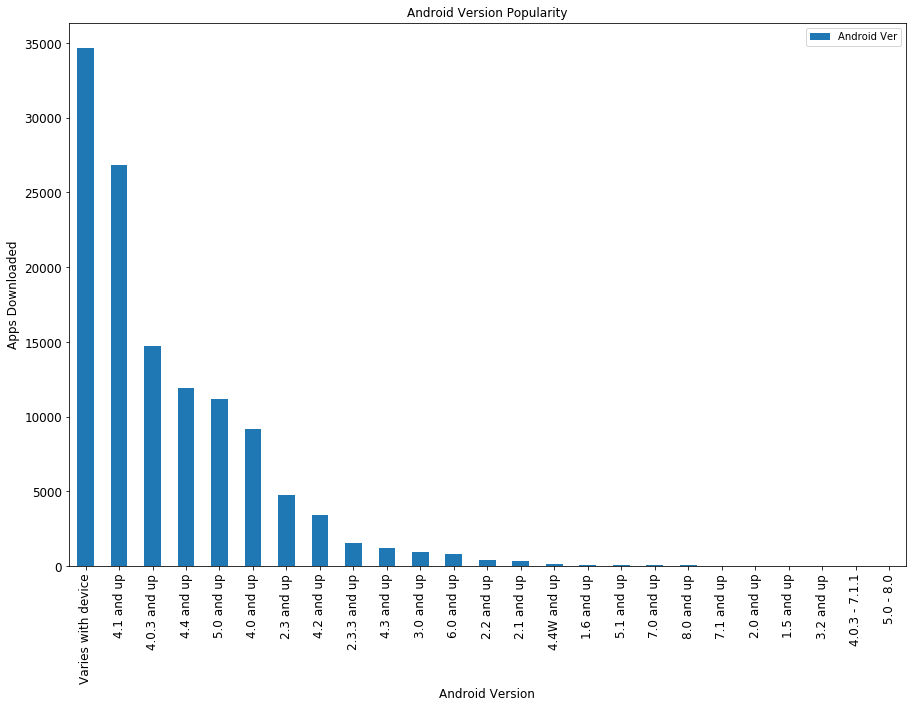

In [14]:
ax = android_version_df.plot(kind='bar', title ="Android Version Popularity", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Android Version", fontsize=12)
ax.set_ylabel("Apps Downloaded", fontsize=12)

plt.savefig('output/AndroidVersionPopularityBarChart.png')


One of the notable details is that, while one might assume that the most current version of Android would be the most popular, it is actually a version of Android that is at least three major versions older.